# Alpha Shapes

A Python package for reconstructing the shape of a 2D point cloud on the plane.

## Introduction
Given a finite set of points (or point cloud) in the Euclidean plane, [alpha shapes](https://en.wikipedia.org/wiki/Alpha_shape) are members of a family of closed polygons on the 2D plane associated with the shape of this point cloud. Each alpha shape is associated with a single non negative parameter **α**. 

Intuitively an alpha shape can be conceptualized as follows. Imagine carving out the plane using a cookie scoop of radius 1/**α**, without removing any of the points in the point cloud. The shape that remains **is** the shape of the point cloud. If we replace the arc-like edges, due to the circular rim of the scoop, with straight segments, we are left with the alpha shape of parameter **α**.


Given a finite set of points (or point cloud) in the Euclidean plane, [alpha shapes](https://en.wikipedia.org/wiki/Alpha_shape) are members of a family of closed polygons on the 2D plane associated with the shape of this point cloud. Each alpha shape is associated with a single non negative parameter **α**. 

Intuitively an alpha shape can be conceptualized as follows. Imagine carving out the plane using a cookie scoop of radius 1/**α**, without removing any of the points in the point cloud. The shape that remains **is** the shape of the point cloud. If we replace the arc-like edges, due to the circular rim of the scoop, with straight segments, we are left with the alpha shape of parameter **α**.

## Installation
```console
pip install alpha_shapes
```

## Usage

In [1]:
import matplotlib.pyplot as plt
from alpha_shapes import Alpha_Shaper, plot_alpha_shape

Define a set of points. Care must be taken to avoid duplicate points:

In [2]:
points = [(0.,     0.),    (0.,    1.),    (1.,     1.1),
          (1.,     0.),    (0.25,  0.15),  (0.65,   0.45),
          (0.75,   0.75),  (0.5,   0.5),   (0.5,    0.25),
          (0.5,    0.75),  (0.25,  0.5),   (0.75,   0.25),
          (0.,     2.),    (0.,    2.1),   (1.,     2.1),
          (0.5,    2.5),   (-0.5,  1.5),   (-0.25,  1.5),
          (-0.25,  1.25),  (0,     1.25),  (1.5,    1.5),
          (1.25,   1.5),   (1.25,  1.25),  (1,      1.25),
          (1.,    2.),    (0.25,   2.15),
          (0.65,   2.45),  (0.75,  2.75),  (0.5,    2.25),
          (0.5,    2.75),  (0.25,  2.5),   (0.75,   2.25)]

Create the alpha shaper

In [3]:
shaper = Alpha_Shaper(points)

For the alpha shape to be calculated, the user must choose a value for the `alpha` parameter.
Here, let us set `alpha` to 3.0:

In [19]:
# Calculate the shape
alpha = 5.3
alpha_shape = shaper.get_shape(alpha=alpha)

Visualize the result:

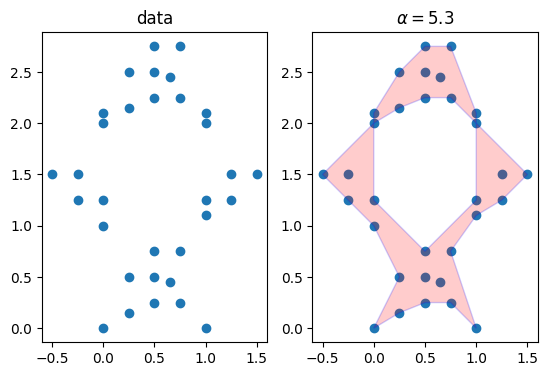

In [22]:
fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.scatter(*zip(*points))
ax0.set_title('data')
ax1.scatter(*zip(*points))
plot_alpha_shape(ax1, alpha_shape)
ax1.set_title(f"$\\alpha={alpha:.3}$")

for ax in (ax0, ax1):
    ax.set_aspect('equal')

Good results depend on a successful choise for the value of `alpha`. If for example we choose a sligtly smaller value, e.g. $\alpha = 4.8$:

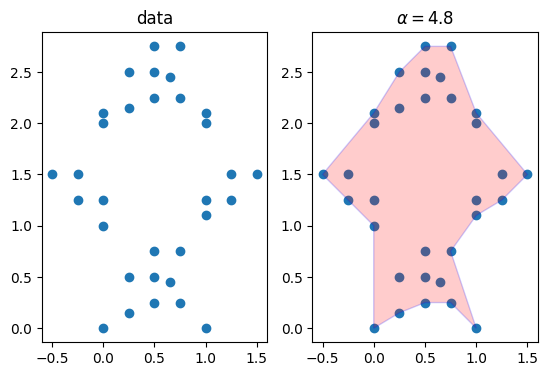

In [23]:
# Calculate the shape for smaller alpha
alpha = 4.8
alpha_shape = shaper.get_shape(alpha=alpha)

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.scatter(*zip(*points))
ax0.set_title('data')
ax1.scatter(*zip(*points))
plot_alpha_shape(ax1, alpha_shape)
ax1.set_title(f"$\\alpha={alpha:.3}$")

for ax in (ax0, ax1):
    ax.set_aspect('equal')

We find out that the hole is no longer there.
On the other hand, for larger alpha values, e.g. $\alpha = 5.6$

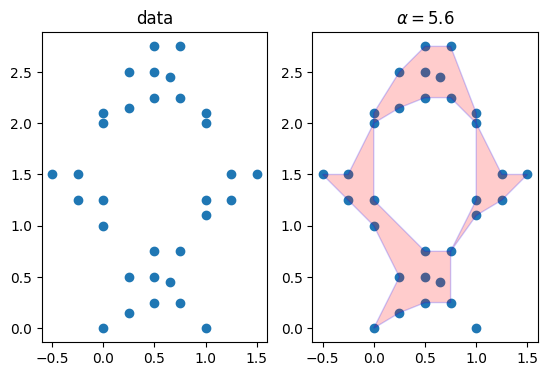

In [24]:
# Calculate the shape for larger alpha
alpha = 5.6
alpha_shape = shaper.get_shape(alpha=alpha)

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.scatter(*zip(*points))
ax0.set_title('data')
ax1.scatter(*zip(*points))
plot_alpha_shape(ax1, alpha_shape)
ax1.set_title(f"$\\alpha={alpha:.3}$")

for ax in (ax0, ax1):
    ax.set_aspect('equal')

We find out that mabe we have cut out too much. The point on the bottom right is no longer incuded in the shape

## Features

### Optimization

A satisfactory calculation of the alpha shape requires a successful guess of the alpha parameter. While trial and error might work well in some cases, users can let the `Alpha_Shaper` choose a value for them. That is what the `optimize` method is about. It calculates the largest possible value for `alpha`, so that no points from the point cloud are left out.

In [26]:
alpha_opt, alpha_shape = shaper.optimize()
alpha_opt

5.331459512629298

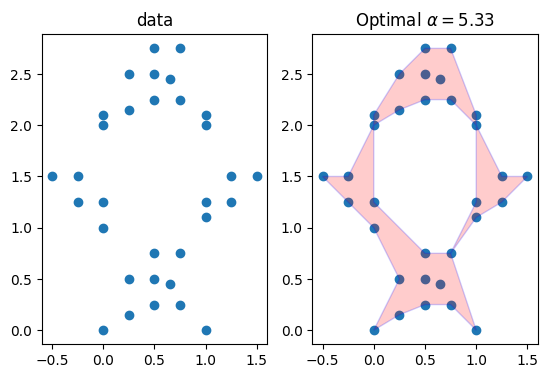

In [27]:
fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.scatter(*zip(*points))
ax0.set_title('data')
ax1.scatter(*zip(*points))
plot_alpha_shape(ax1, alpha_shape)
ax1.set_title(f"Optimal $\\alpha={alpha_opt:.3}$")

for ax in (ax0, ax1):
    ax.set_aspect('equal')

The optimize method runs efficiently for relatively large point clouds. Here we calculate the optimal alpha shape of an ensemble of 1000 random points uniformly distributed on the unit square.  

optimization took: 0.077 sec


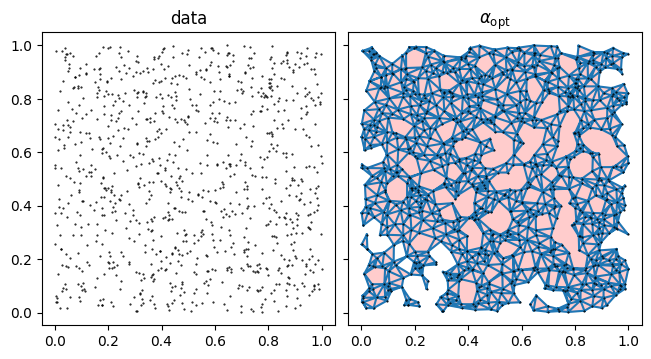

In [39]:
from time import time
import numpy as np


#  Define a set of random points
points = np.random.random((1000, 2))
# Prepare the shaper
alpha_shaper = Alpha_Shaper(points)

# Estimate the optimal alpha value and calculate the corresponding shape
ts = time()
alpha_opt, alpha_shape = alpha_shaper.optimize()
te = time()
print(f'optimization took: {te-ts:.2} sec')

fig, axs = plt.subplots(1,
                        2,
                        sharey=True,
                        sharex=True,
                        constrained_layout=True)

for ax in axs:
    ax.plot(*zip(*points),
            linestyle='',
            color='k',
            marker='.',
            markersize=1)

    ax.set_aspect('equal')

_ = axs[0].set_title('data')

plot_alpha_shape(axs[1], alpha_shape)
axs[1].triplot(alpha_shaper)
_ = axs[1].set_title(r'$\alpha_{\mathrm{opt}}$')

